In [33]:
import nltk
nltk.download('punkt')
from nltk import word_tokenize
import pandas as pd
import re
import numpy as np 
import math
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.preprocessing import MinMaxScaler
from deap import algorithms, base, creator, tools
from nltk import word_tokenize
import re, string
import random
import statistics 
from statistics import mean
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /home/spetz/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [34]:

dict_freq = {}  # frequency map for words in list
dict_paired_freq = {}

path = '/home/spetz/Downloads/DeliciousMIL/Data/train-data.dat'
clean_files = []
df = pd.DataFrame()

file = open(path).readlines()
len(file)

#clear data
clear_file=[]
for i in range(len(file)):
    x=re.sub('<.*?>','',file[i])
    clear_file.append(x)

clear_file=clear_file[:1000]

#perasma tou clear keimenou sto words string
words = ''
for line in clear_file:
    words += line


tokenized_words = word_tokenize(words) # list of all words in new dictionary
WORD_LIST = list(set(tokenized_words)) # create a set out of words so there are no repeats in word list and make list again
dictionary_size = len(WORD_LIST) #6853


#Dhmiourgia dictionary lekseis kai suxnotitas emfanisi tis lekseis se olo to keimeno
for word in tokenized_words: #gia kathe word sto lista leksewn olou tou keimenou
    if word not in dict_freq: 
        dict_freq[word] = 1
    else:
        dict_freq[word] += 1


In [35]:
#TF = (Frequency of the word in the sentence) / (Total number of words in the sentence)
def computeTF(wordDict,bow):
    tfDict={}
    bowCount=len(bow)
    for word,count in wordDict.items():
        tfDict[word] = count/float(bowCount)
    return tfDict

tf=computeTF(dict_freq,tokenized_words)

#IDF: log((Total number of sentences (documents))/(Number of sentences (documents) containing the word))
def computeIDF(docList):
    idfDict = {}
    N = len(docList)
    
    idfDict = dict.fromkeys(dict_freq,0)
    for word, val in idfDict.items():
        idfDict[word] = math.log10(N / (float(val) + 1))
        
    return idfDict

idf=computeIDF(dict_freq)
len(idf)


6853

In [36]:

#FINAL TF-IDF
def computeDFIDF(tfbow,idfs):
    tfidf={}
    for word,val in tfbow.items():
        tfidf[word] = val*idfs[word]

    return tfidf

In [37]:
#final TF-IDF
Tf_idf=computeDFIDF(tf,idf)
#Apothikeusi mono ton timwn
new_list = list(Tf_idf.values())
len(new_list)
tf_idf_Xtrain = np.asarray(new_list)
len(tf_idf_Xtrain)


6853

In [38]:

#Create a FitnessMax class 
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
#Create an Individual class 
creator.create("Individual", list, fitness=creator.FitnessMax)

def getFitness(individual):
    counter = 0
    fitness = 0

    #gia kathe thesi sto indi
    for word_index in individual:
        #vale sto string thn antistoixi leksi
        if new_list[word_index] <= 1:
            fitness += new_list[word_index]
        
        else:
            fitness -=20
    
    return fitness,

        
#The toolbox is a container for functions with their arguments
toolbox = base.Toolbox()
# Attribute generator 
toolbox.register("attr_bool", random.randint, 0, 1)
# Structure initializers
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, len(new_list))
toolbox.register("population", tools.initRepeat, list, toolbox.individual) 
# Register the genetic operators	
toolbox.register("evaluate", getFitness)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)


/home/spetz/.local/lib/python3.10/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/spetz/.local/lib/python3.10/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


0 Prospatheia 
-- Generation 1 --
 Max fitness:15.775479322707287
-- Generation 2 --
 Max fitness:15.795669366480162
-- Generation 3 --
 Max fitness:15.81585941025305
-- Generation 4 --
 Max fitness:15.812120513258046
-- Generation 5 --
 Max fitness:15.813616072056044
-- Generation 6 --
 Max fitness:15.815111630854028
-- Generation 7 --
 Max fitness:15.819598307248006
-- Generation 8 --
 Max fitness:15.819598307248006
1 Prospatheia 
-- Generation 1 --
 Max fitness:15.758280396530338
-- Generation 2 --
 Max fitness:15.758280396530344
-- Generation 3 --
 Max fitness:15.766505969919296
-- Generation 4 --
 Max fitness:15.770992646313276
-- Generation 5 --
 Max fitness:15.78669601369219
2 Prospatheia 
-- Generation 1 --
 Max fitness:15.744820367348373
-- Generation 2 --
 Max fitness:15.754541499535348
-- Generation 3 --
 Max fitness:15.785948234293175
-- Generation 4 --
 Max fitness:15.785948234293175
-- Generation 5 --
 Max fitness:15.791182690086146
-- Generation 6 --
 Max fitness:15.7919

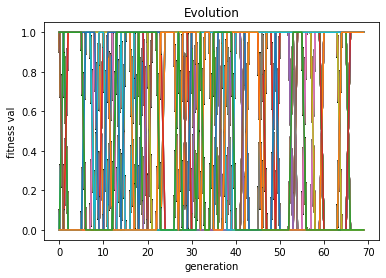

In [48]:
population_size=20
prob_cross = 0.6
prob_mutation = 0.01
genererations = 10

Howmanygenerations =list()
BestFitnessForAllGens =list()
BestFitnessPerGens =list()
BestFitness = list()

def main(population_size,prob_cross,prob_mutation):
  stats = tools.Statistics(key=lambda ind:ind.fitness.values)
  log = tools.Logbook()
 

  for i in range(10): # iterations
      print("%d Prospatheia "%(i))
       # dimiourgia plithismou
      pop = toolbox.population(n=population_size)

    #Evaluation fitness function 
      fitnesses = list(map(toolbox.evaluate, pop))
      for ind, fit in zip(pop, fitnesses):
        ind.fitness.values = fit
  
    # CXPB pithanotita zeugaromatos
    # MUTPB pithanotita metalakseis
      CXPB, MUTPB = prob_cross, prob_mutation

      #Statistics
      stats = tools.Statistics(key=lambda ind:ind.fitness.values)

	# Extracting all the fitnesses of (epistrefi to fitness)
      fits = [ind.fitness.values[0] for ind in pop]
	
    # Variable keeping track of the number of generations
      g = 0
    #upologismos kritiriwn 
      check_critiria =0
      #Save to fitness pou exoume
      previous_fit=max(fits)
      #best fitness apo oles tis genies
      best_fitness=0
  # Begin the evolution
      while check_critiria < 5 and g < 10:

    # A new generation
        g = g + 1
        print("-- Generation %i --" % g) 

    # Select the next generation individuals
        offspring = toolbox.select(pop, len(pop))
    # Clone the selected individuals
        offspring = list(map(toolbox.clone, offspring)) 

    # Apply crossover and mutation on the offspring
        for child1, child2 in zip(offspring[::2], offspring[1::2]):
            if random.random() < CXPB:
                toolbox.mate(child1, child2)
                del child1.fitness.values
                del child2.fitness.values

        for mutant in offspring:
            if random.random() < MUTPB:
                toolbox.mutate(mutant)
                del mutant.fitness.values


    # Evaluate the individuals with an invalid fitness
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = map(toolbox.evaluate, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit

    # Replace the old population by the offspring
        pop[:] = offspring  


    # Gather all the fitnesses in one list and print the stats
        fits = [ind.fitness.values[0] for ind in pop]

        record = stats.compile(pop)
        log.record(gen=g , **record)


        #Ean papsei na veltiwnete to fitness h to max fit pou vriskw mikrotero apo to prohgoumeno pou eixa
        if max(fits) < (1.001*previous_fit) or previous_fit == max(fits):
            check_critiria += 1
        else:
            check_critiria = 0
        
        previous_fit =max(fits)

        log.header=["gen"] +stats.fields
        print(" Max fitness:%s" %max(fits))


        #PREPEI NA VROUME TO BEST FITNESS 
        bestfitness =max(fits)
        if bestfitness > best_fitness:
            best_fitness = bestfitness
            bestindex_of_fitness =pop[fits.index(bestfitness)]
        BestFitnessPerGens.append(bestindex_of_fitness)
#################################################################################
        meanFit =int(sum(fits)/len(pop))

################################################################################
        log.record(gen=g,**stats.compile(pop))
      
      #genies
      Howmanygenerations.append(g)
      #Vale stin lista mono to megalutero stoixio pou vrikes
      BestFitnessForAllGens.append(max(BestFitnessPerGens))

        #length = len(pop)
        #mean = sum(fits) / length
        #sum2 = sum(x*x for x in fits)
        #std = abs(sum2 / length - mean**2)**0.5

        #print("  Min %s" % min(fits))
        #print("  Max %s" % max(fits))
        #print("  Avg %s" % mean)
        #print("  Std %s" % std)
  best_ind = tools.selBest(pop,1)
  print("sfsffsfs:",(best_ind))
  print("Avg for generations:",mean(Howmanygenerations))
  print("Best Avg fitness:",np.mean(meanFit))
  #print("Best solution",(BestFitnessForAllGens))


  plt.plot(BestFitnessPerGens)
  plt.title("Evolution")
  plt.xlabel("generation")
  plt.ylabel("fitness val")
  plt.show()
	
# Run GA Algorithm
main(population_size,prob_cross,prob_mutation)  
